# Kaggle Setup

In [ ]:
! cd ~/Downloads/Kaggle_competition 
! mkdir ~/Downloads/Kaggle_competition/.kaggle
! cp kaggle.json ~/Downloads/Kaggle_competition/.kaggle
! chmod 600 ~/Downloads/Kaggle_competition/.kaggle/kaggle.json
! kaggle datasets list
! kaggle competitions download -c playground-series-s5e7
! unzip playground-series-s5e7.zip -d /Users/chihanglung/Downloads/Kaggle_competition

587.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


# Data Preprocessing

In [63]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
data = pd.read_csv('train.csv',index_col=0)
data.head(5)
numerical_features = data.select_dtypes(include=[np.number])
X = data.drop(columns=['Personality'])
y = data['Personality']
numerical_features = numerical_features.columns

In [ ]:
#drop and imputing null values
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].median())
X.fillna(X.mode(),inplace=True)
X = pd.get_dummies(X,columns=['Stage_fear','Drained_after_socializing'])

Time_spent_Alone                 0
Social_event_attendance          0
Going_outside                    0
Friends_circle_size              0
Post_frequency                   0
Stage_fear_No                    0
Stage_fear_Yes                   0
Drained_after_socializing_No     0
Drained_after_socializing_Yes    0
dtype: int64

<Axes: >

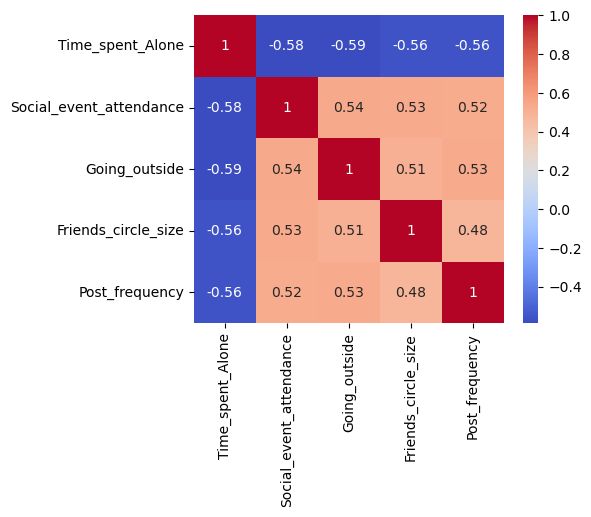

In [52]:
plt.figure(figsize=(5,4))
sns.heatmap(X[numerical_features].corr(),annot=True,cmap='coolwarm')

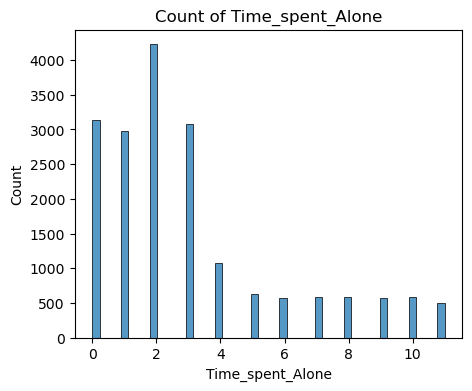

In [59]:
def plot_distribution(column):
    plt.figure(figsize=(5,4))
    sns.histplot(X[column])
    plt.title(f'Count of {column}')
    plt.show()
plot_distribution('Time_spent_Alone')

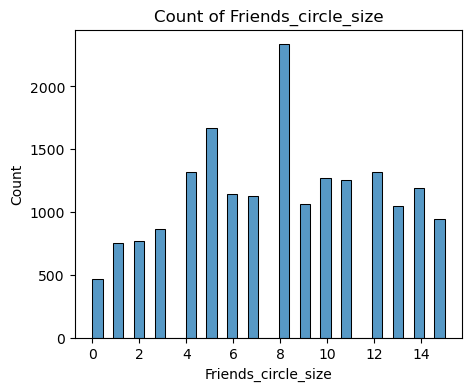

In [62]:
plot_distribution('Friends_circle_size')

In [ ]:
# check multilinearity
vif_x = pd.DataFrame()
vif_x["VIF"] = [variance_inflation_factor(X[numerical_features].values, i) for i in range(X[numerical_features].shape[1])]
vif_x.index = X[numerical_features].columns
vif_x

,VIF
Time_spent_Alone,1.306109
Social_event_attendance,8.021951
Going_outside,8.135068
Friends_circle_size,7.285508
Post_frequency,6.716725


These 4 features are highly correlated with each other. But acceptable since personlaity traits incluence each other.
1. Remove any one of Going_outside and Social_event_attendance: are conceptually similar
2. L1 or L2 regularization


In [139]:
X.drop('Going_outside',axis=1,inplace=True)

KeyError: "['Going_outside'] not found in axis"

In [ ]:
X.iloc[:, 4:] = X.iloc[:, 4:].astype(int)


,Time_spent_Alone,Social_event_attendance,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
id,,,,,,,,
0,0.0,6.0,15.0,5.0,1,0,1,0
1,1.0,7.0,10.0,8.0,1,0,1,0
2,6.0,1.0,3.0,0.0,0,1,0,0
3,3.0,7.0,11.0,5.0,1,0,1,0
4,1.0,4.0,13.0,5.0,1,0,1,0
...,...,...,...,...,...,...,...,...
18519,3.0,7.0,9.0,7.0,1,0,1,0
18520,1.0,6.0,6.0,5.0,0,0,1,0
18521,7.0,1.0,1.0,5.0,0,1,0,1


In [86]:
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               18524 non-null  float64
 1   Social_event_attendance        18524 non-null  float64
 2   Friends_circle_size            18524 non-null  float64
 3   Post_frequency                 18524 non-null  float64
 4   Stage_fear_No                  18524 non-null  int64  
 5   Stage_fear_Yes                 18524 non-null  int64  
 6   Drained_after_socializing_No   18524 non-null  int64  
 7   Drained_after_socializing_Yes  18524 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1.3 MB


,Time_spent_Alone,Social_event_attendance,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
count,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000
mean,3.064673,5.248219,7.996923,4.983319,0.680685,0.217124,0.718689,0.219283
std,2.919057,2.665002,4.101561,2.779172,0.466224,0.412299,0.449651,0.413772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,5.000000,8.000000,5.000000,1.000000,0.000000,1.000000,0.000000
75%,4.000000,7.000000,11.000000,7.000000,1.000000,0.000000,1.000000,0.000000
max,11.000000,10.000000,15.000000,10.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [124]:
#L1 penalty
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1) 
model_l1 = model_l1.fit(X_train,y_train)
tested_result = model_l1.predict(X_test)
result_comp = pd.DataFrame({"Actual" : y_test,"Prediction" : tested_result})
result_comp["score"] = (result_comp["Actual"] == result_comp["Prediction"]).astype(int)
score = result_comp.value_counts(["score"])
display(f"The ratio of success prediction: {(score[1])/score.sum():.4f}")

'The ratio of success prediction: 0.9733'

In [125]:
#L2 penality
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.1) 
model_l2 = model_l2.fit(X_train,y_train)
tested_result = model_l2.predict(X_test)
result_comp = pd.DataFrame({"Actual" : y_test,"Prediction" : tested_result})
result_comp["score"] = (result_comp["Actual"] == result_comp["Prediction"]).astype(int)
score = result_comp.value_counts(["score"])
display(f"The ratio of success prediction: {(score[1])/score.sum():.4f}")

'The ratio of success prediction: 0.9733'

In [123]:
print("L1 coefficients:", model_l1.coef_)
print("L2 coefficients:", model_l2.coef_)

L1 coefficients: [[ 0.2224293  -0.11671312 -0.06486215 -0.09607348 -0.9820174   0.92254298
  -1.63412359  0.91180153]]
L2 coefficients: [[ 0.2125032  -0.13175709 -0.07338739 -0.10942033 -1.00955017  0.88572705
  -1.54585557  0.87734212]]


In [109]:
#Advanced Modelling using Grid Search
from sklearn.model_selection import GridSearchCV

In [126]:
para_grid = {'penalty':['l1','l2'],'C':[0.1,1,10],'solver':['liblinear']}
log_reg = LogisticRegression()
log_reg_cv = GridSearchCV(log_reg,para_grid,scoring='accuracy',cv=10)
log_reg_cv.fit(X_train,y_train)
display(log_reg_cv.best_params_)
display(log_reg_cv.best_score_)
test_result = log_reg_cv.predict(X_test)
result_comp = pd.DataFrame({"Actual" : y_test,"Prediction" : tested_result})
result_comp["score"] = (result_comp["Actual"] == result_comp["Prediction"]).astype(int)
score = result_comp.value_counts(["score"])
display(f"The ratio of success prediction: {(score[1])/score.sum():.4f}")

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

np.float64(0.9681489145915743)

'The ratio of success prediction: 0.9733'

In [127]:
#SVC modelling
from sklearn.svm import SVC

In [128]:
svc = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svc_model = GridSearchCV(svc,param_grid,scoring='accuracy',cv=10)
svc_model.fit(X_train,y_train)
svc_model.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [129]:
svc_model.best_score_

np.float64(0.9680139618250424)

In [ ]:
from xgboost import XGBClassifier

In [161]:
xgb = XGBClassifier(
    max_depth=4,         
    learning_rate=0.01,   
    n_estimators=1000,    
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
y_train_mapped = y_train.map({'Introvert':0,'Extrovert':1})
y_test_mapped = y_test.map({'Introvert':0,'Extrovert':1})
xgb.fit(X_train,y_train_mapped)
tested_result = xgb.predict(X_test)

result_comp = pd.DataFrame({"Actual" : y_test_mapped,"Prediction" : tested_result})
result_comp["score"] = (result_comp["Actual"] == result_comp["Prediction"]).astype(int)
score = result_comp.value_counts(["score"])
score[1]/sum(score)

np.float64(0.9730094466936572)

# Submission

In [137]:
data_submit = pd.read_csv('test.csv',index_col=0)
data_submit[numerical_features] =  data_submit[numerical_features].fillna(data_submit[numerical_features].median())
data_submit = pd.get_dummies(data_submit,columns=['Stage_fear','Drained_after_socializing'])
data_submit.iloc[:, 4:] = data_submit.iloc[:, 4:].astype(int)
data_submit

/var/folders/_q/0zd4szy510g43b2ptl354v340000gn/T/ipykernel_28688/819324032.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'id
18524    1
18525    0
18526    1
18527    1
18528    0
        ..
24694    1
24695    0
24696    1
24697    1
24698    0
Name: Stage_fear_No, Length: 6175, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_submit.iloc[:, 4:] = data_submit.iloc[:, 4:].astype(int)
/var/folders/_q/0zd4szy510g43b2ptl354v340000gn/T/ipykernel_28688/819324032.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'id
18524    0
18525    1
18526    0
18527    0
18528    1
        ..
24694    0
24695    1
24696    0
24697    0
24698    1
Name: Stage_fear_Yes, Length: 6175, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_submit.iloc[

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
id,,,,,,,,,
18524,3.0,7.0,4.0,6.0,5.0,1,0,1,0
18525,2.0,0.0,0.0,5.0,1.0,0,1,0,1
18526,3.0,5.0,6.0,15.0,9.0,1,0,1,0
18527,3.0,4.0,4.0,5.0,6.0,1,0,1,0
18528,9.0,1.0,2.0,1.0,1.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
24694,3.0,5.0,5.0,9.0,6.0,1,0,1,0
24695,8.0,2.0,1.0,0.0,0.0,0,1,0,1
24696,2.0,4.0,3.0,9.0,7.0,1,0,1,0


In [138]:
data_submit.drop('Going_outside',axis=1,inplace=True)

In [ ]:
predict_value = model_l1.predict(data_submit)
submission = pd.DataFrame({'id': data_submit.index, 'BeatsPerMinute': predict_value})
submission.to_csv('submission.csv', index=False)
print("Done!")
